# Time Series Data Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vega_datasets import data

## `sf_temps()`

In [2]:
# get data
df = data.sf_temps()

In [3]:
# take a look
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.shape

(8759, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [6]:
# make time data into index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


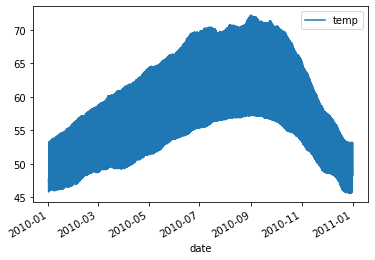

In [7]:
df.plot();

### 1.

Resample by the day and take the average temperature. Visualize the average temperature over time.

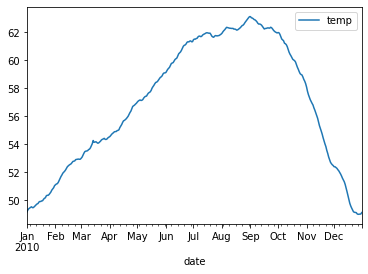

In [8]:
df.resample('D').mean().plot();

### 2.

Write the code necessary to visualize the minimum temperature over time.

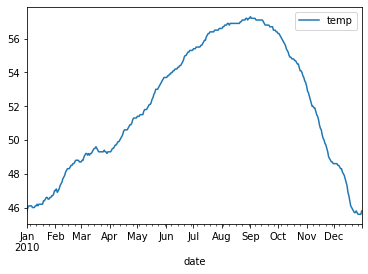

In [9]:
df.resample('D').min().plot();

### 3.

Write the code necessary to visualize the maximum temperature over time.

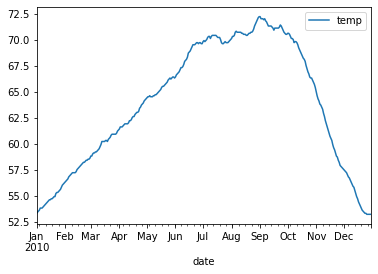

In [15]:
df.resample('D').max().plot();

### 4.

Which month is the coldest, on average?

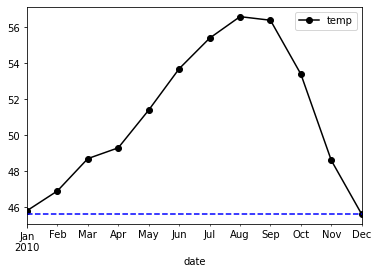

In [25]:
df.resample('M').min().plot(marker='o', color = 'black')
plt.axhline(df.resample('M').min().min()[0], ls='--', color = 'blue');

In [26]:
df.resample('M').min().style.highlight_min(color='blue')

,temp
date,
2010-01-31 00:00:00,45.800000
2010-02-28 00:00:00,46.900000
2010-03-31 00:00:00,48.700000
2010-04-30 00:00:00,49.300000
2010-05-31 00:00:00,51.400000
2010-06-30 00:00:00,53.700000
2010-07-31 00:00:00,55.400000
2010-08-31 00:00:00,56.600000
2010-09-30 00:00:00,56.400000


**December**

### 5.

Which month has the highest average temperature?

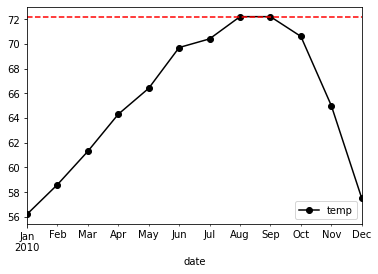

In [23]:
df.resample('M').max().plot(marker='o', color = 'black')
plt.axhline(df.resample('M').max().max()[0], ls='--', color = 'red')
plt.legend();

In [14]:
df.resample('M').max().style.highlight_max(color='red')

,temp
date,
2010-01-31 00:00:00,56.200000
2010-02-28 00:00:00,58.600000
2010-03-31 00:00:00,61.300000
2010-04-30 00:00:00,64.300000
2010-05-31 00:00:00,66.400000
2010-06-30 00:00:00,69.700000
2010-07-31 00:00:00,70.400000
2010-08-31 00:00:00,72.200000
2010-09-30 00:00:00,72.200000


**August and September**

### 6.

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [35]:
min_max = df.resample('D').agg(['min', 'max'])
min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [37]:
min_max.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [38]:
min_max['daily_temp_delta'] = min_max[('temp', 'max')] - min_max[('temp', 'min')]

In [39]:
min_max.head()

temp       daily_temp_delta
             min   max                 
date                                   
2010-01-01  45.8  53.3              7.5
2010-01-02  46.0  53.4              7.4
2010-01-03  46.1  53.5              7.4
2010-01-04  46.1  53.6              7.5
2010-01-05  46.1  53.8              7.7

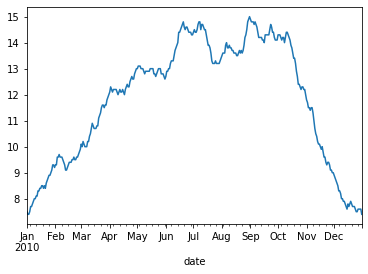

In [42]:
min_max.daily_temp_delta.plot();

In [50]:
pd.DataFrame(min_max.daily_temp_delta.resample('M').mean()).style.highlight_max(color='green')

,daily_temp_delta
date,
2010-01-31 00:00:00,8.341935
2010-02-28 00:00:00,9.485714
2010-03-31 00:00:00,10.854839
2010-04-30 00:00:00,12.320000
2010-05-31 00:00:00,12.909677
2010-06-30 00:00:00,13.950000
2010-07-31 00:00:00,13.977419
2010-08-31 00:00:00,13.870968
2010-09-30 00:00:00,14.403333


### 7. (Bonus)

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

## `seattle_weather()`

### 1.

Which year and month combination has the highest amount of precipitation?

### 2.

Visualize the amount of monthly precipitation over time.

### 3.

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

### 4.

Which year-month combination is the windiest?

### 5.

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

### 6.

In which month does it rain the most?

### 7.

Which month has the most number of days with a non-zero amount of precipitation?

## `flights_20k()`

### 1.

Convert any negative delays to 0.

### 2.

Which hour of the day has the highest average delay?

### 3.

Does the day of the week make a difference in the delay amount?

### 4.

Does the month make a difference in the delay amount?